# Data preparation
## era5cli 
- conda install -c conda-forge era5cli (env:geo-data)
- conda install -c conda-forge xarray netCDF4 scipy bottleneck matplotlib cartopy seaborn nc-time-axis
- cmd: era5cli monthly --variables 2m_temperature --startyear 2022 --endyear 2024 --ensemble

# Data processing and plotting

In [2]:
from pathlib import Path

In [3]:
cwd = Path.cwd()
str(cwd)

'c:\\Dropbox\\CODE2\\data-analysis\\github\\graphs-for-sm\\graphs-for-sm\\notebooks'

In [4]:
import xarray as xa

In [7]:
data_folder = cwd / "../../data"
data_folder.is_dir()

True

In [9]:
ds = xa.open_dataset(data_folder / "era5_2m_temperature_2022_monthly_ensemble.nc")

In [56]:
ds_23 = xa.open_dataset(data_folder / "era5_2m_temperature_2023_monthly_ensemble.nc")

In [69]:
ds_24 = xa.open_dataset(data_folder / "era5_2m_temperature_2024_monthly_ensemble.nc")

In [10]:
df_22 = ds.to_dataframe()

In [57]:
df_23 = ds_23.to_dataframe()

In [70]:
df_24 = ds_24.to_dataframe()

In [58]:
df_22.tail()

t2m    celcius
longitude latitude number time                             
359.5     -90.0    9      2022-08-01  221.774087 -51.375913
                          2022-09-01  218.868167 -54.281833
                          2022-10-01  223.993725 -49.156275
                          2022-11-01  235.501367 -37.648633
                          2022-12-01  244.948507 -28.201493

In [92]:
df_22["celcius"] = df_22["t2m"] - 273.15

In [93]:
df_23["celcius"] = df_23["t2m"] - 273.15

In [94]:
df_24["celcius"] = df_24["t2m"] - 273.15

In [78]:
df_23["celcius"].loc[19, 70, 2, :].head()

time
2023-01-01   -1.644752
2023-02-01    0.202361
2023-03-01   -3.529763
2023-04-01    2.527317
2023-05-01    5.537733
Name: celcius, dtype: float64

In [59]:
df_23.tail()

t2m
longitude latitude number time                  
359.5     -90.0    9      2023-08-01  222.063255
                          2023-09-01  221.710639
                          2023-10-01  226.601122
                          2023-11-01  238.792728
                          2023-12-01  245.410039

In [83]:
celcius_tos_22 = df_22["celcius"].loc[19, 70, 0, :].values

In [95]:
celcius_tos_23 = df_23["celcius"].loc[19, 70, 0, :].values

In [85]:
celcius_tos_24 = df_24["celcius"].loc[19, 70, 0, :].values

In [88]:
time_22_0 = df_22.loc[19, 70, 0, :].index.get_level_values("time")

In [96]:
time_23_0 = df_23.loc[19, 70, 0, :].index.get_level_values("time")

In [90]:
time_24_0 = df_24.loc[19, 70, 0, :].index.get_level_values("time")

In [28]:
import matplotlib.pyplot as plt 

In [54]:
time_22_0.shape

(12,)

In [75]:
time_24_0.month

Index([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6], dtype='int32', name='time')

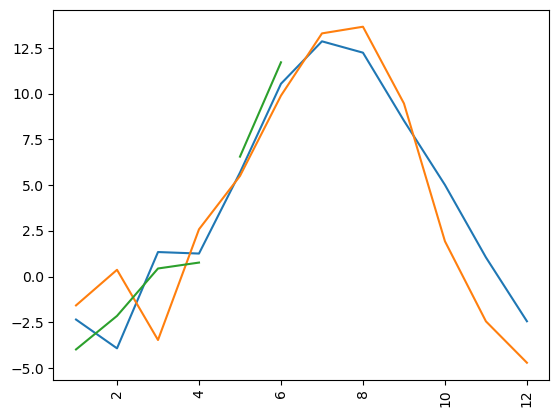

In [97]:
plt.plot(time_22_0.month, celcius_tos_22)
plt.plot(time_23_0.month, celcius_tos_23)
plt.plot(time_24_0.month, celcius_tos_24)
plt.xticks(rotation=90)
plt.show()